### Load the necessary libraries

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.model_selection as ms
import sklearn.metrics as sklm
from sklearn import preprocessing
from sklearn import linear_model

import numpy.random as nr
import scipy.stats as ss
import math

%matplotlib inline

### Load the datasets

In [220]:
advWorksCusts = pd.read_csv("AdvWorksCusts.csv")
aw_AveMonthSpend = pd.read_csv('AW_AveMonthSpend.csv')
aw_BikeBuyer = pd.read_csv('AW_BikeBuyer.csv')

### Search for duplicates

Since the ** customer id ** should be unique, we use it to search for duplicates

In [121]:
print(advWorksCusts.shape)
print(advWorksCusts.CustomerID.unique().shape)

print(aw_AveMonthSpend.shape)
print(aw_AveMonthSpend.CustomerID.unique().shape)

print(aw_BikeBuyer.shape)
print(aw_BikeBuyer.CustomerID.unique().shape)

(16519, 23)
(16404,)
(16519, 2)
(16404,)
(16519, 2)
(16404,)


There seems to be duplicates in the individual datasets: 115 duplicate cases in each dataset

Next thing is to remove the duplicates.
Retain the most recent version of a duplicated record.

In [221]:
advWorksCusts.drop_duplicates(subset = 'CustomerID', keep = 'first', inplace = True)
aw_AveMonthSpend.drop_duplicates(subset = 'CustomerID', keep = 'first', inplace = True)
aw_BikeBuyer.drop_duplicates(subset = 'CustomerID', keep = 'first', inplace = True)

### Confirm the removal of duplicates

In [5]:
print(advWorksCusts.shape)
print(advWorksCusts.CustomerID.unique().shape)

print(aw_AveMonthSpend.shape)
print(aw_AveMonthSpend.CustomerID.unique().shape)

print(aw_BikeBuyer.shape)
print(aw_BikeBuyer.CustomerID.unique().shape)

(16404, 23)
(16404,)
(16404, 2)
(16404,)
(16404, 2)
(16404,)


Duplicates successfully removed.

### Merge the datasets

In [222]:
all_data = pd.merge(advWorksCusts, aw_AveMonthSpend, on='CustomerID')
all_data = all_data.merge(aw_BikeBuyer, on='CustomerID')

### Check for duplicates in the merged dataset

In [189]:
print(all_data.shape)
print(all_data.CustomerID.unique().shape)

(16404, 25)
(16404,)


There is no duplicates in the merged data

### View info about the columns

In [8]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16404 entries, 0 to 16403
Data columns (total 25 columns):
CustomerID              16404 non-null int64
Title                   88 non-null object
FirstName               16404 non-null object
MiddleName              9453 non-null object
LastName                16404 non-null object
Suffix                  2 non-null object
AddressLine1            16404 non-null object
AddressLine2            274 non-null object
City                    16404 non-null object
StateProvinceName       16404 non-null object
CountryRegionName       16404 non-null object
PostalCode              16404 non-null object
PhoneNumber             16404 non-null object
BirthDate               16404 non-null object
Education               16404 non-null object
Occupation              16404 non-null object
Gender                  16404 non-null object
MaritalStatus           16404 non-null object
HomeOwnerFlag           16404 non-null int64
NumberCarsOwned         16404

The above detail shows that some columns contain missing values

From the above: <br>
Title: 16316 missing values <br>
MiddleName: 6951 missing values <br>
Suffix: 16402 missing values <br>
AddressLine2: 16130 missing values <br>

The best case is to remove all the columns with missing values since the number of missing values is much

In [223]:
all_data.drop(all_data[['Title', 'MiddleName', 'FirstName', 'LastName', 'Suffix', 'AddressLine2', 'AddressLine1','City', 'StateProvinceName', 'CountryRegionName', 'PostalCode','PhoneNumber']], axis=1, inplace=True)

In [224]:
all_data.drop(all_data[['BikeBuyer']], axis=1, inplace=True)
all_data.head()

,CustomerID,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend
0,11000,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947,89
1,11001,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141,117
2,11002,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945,123
3,11003,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688,50
4,11004,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771,95


In [196]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16404 entries, 0 to 16403
Data columns (total 12 columns):
CustomerID              16404 non-null int64
BirthDate               16404 non-null object
Education               16404 non-null object
Occupation              16404 non-null object
Gender                  16404 non-null object
MaritalStatus           16404 non-null object
HomeOwnerFlag           16404 non-null int64
NumberCarsOwned         16404 non-null int64
NumberChildrenAtHome    16404 non-null int64
TotalChildren           16404 non-null int64
YearlyIncome            16404 non-null int64
AveMonthSpend           16404 non-null int64
dtypes: int64(7), object(5)
memory usage: 2.3+ MB


## Data Exploration

#### View the first five rows

In [197]:
all_data.head()

,CustomerID,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend
0,11000,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947,89
1,11001,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141,117
2,11002,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945,123
3,11003,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688,50
4,11004,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771,95


#### View the datatype of each column

In [12]:
all_data.dtypes

CustomerID               int64
FirstName               object
LastName                object
AddressLine1            object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
AveMonthSpend            int64
BikeBuyer                int64
dtype: object

#### Summary statistics for numeric columns

In [13]:
all_data.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
count,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000
mean,20240.143136,0.674104,1.499756,0.991100,2.004511,78128.531517,72.389905,0.332297
std,5340.370705,0.468723,1.139135,1.514278,1.682318,39726.533060,27.269568,0.471051
min,11000.000000,0.000000,0.000000,0.000000,0.000000,9482.000000,22.000000,0.000000
25%,15617.750000,0.000000,1.000000,0.000000,0.000000,47811.750000,52.000000,0.000000
50%,20231.500000,1.000000,2.000000,0.000000,2.000000,76125.000000,68.000000,0.000000
75%,24862.250000,1.000000,2.000000,2.000000,3.000000,105200.250000,84.000000,1.000000
max,29482.000000,1.000000,4.000000,5.000000,5.000000,196511.000000,176.000000,1.000000


### Which columns are categorical and numerical?

In [225]:
categorical_columns = [col for col in all_data.columns if all_data[col].dtype == 'object']
numerical_columns = [col for col in all_data.columns if col not in categorical_columns]

### Understand the distribution of categorical variables

#### The code below shows the frequency of each unique category of a categorical variable

In [9]:
def count_unique(all_data, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(all_data[col].value_counts())
        
count_unique(all_data, categorical_columns)


For column FirstName
Jennifer       87
Richard        86
Lucas          85
Isabella       85
Eduardo        85
Dalton         85
Katherine      85
Morgan         84
Marcus         84
Alexandra      82
Sydney         81
Kaitlyn        79
Natalie        79
Chloe          78
Xavier         77
Julia          77
Seth           76
Ian            76
James          72
Devin          72
Thomas         71
Jose           68
Jessica        68
Miguel         67
Abigail        67
Rachel         66
Jordan         66
Wyatt          65
Jonathan       65
Samuel         65
               ..
Marty           1
Yvonne          1
César           1
K.              1
Rohinton        1
Ioannis         1
Pearlie         1
Giraldo         1
Bernard         1
Niñia           1
Pablo           1
Mircea          1
Dorothy         1
Daisuke         1
Mikael          1
Lloyd           1
Osarumwense     1
Liz             1
Britta          1
Rakesh          1
Masaki          1
Mark            1
Jim             1
Irving

Bachelors              4758
Partial College        4451
High School            2944
Graduate Degree        2851
Partial High School    1400
Name: Education, dtype: int64

For column Occupation
Professional      4922
Skilled Manual    4038
Management        2718
Clerical          2597
Manual            2129
Name: Occupation, dtype: int64

For column Gender
M    8290
F    8114
Name: Gender, dtype: int64

For column MaritalStatus
M    8852
S    7552
Name: MaritalStatus, dtype: int64


#### Note the following: <br>
    1. Some of these variables have a large number of categories <br>
    2. There are significant imbalances in the counts of some categories.

The categorical columns necessary (for me) to train the machine learning model are <br>
        **  CountryRegionName, Education, Occupation, Gender, MaritalStatus **


In [228]:
categorical_columns_req = ['Education', 'Occupation', 'Gender', 'MaritalStatus']
#del numerical_columns['CustomerId']
#del BikeBuyer and AveMonthSpend 
#del numerical_columns[5:]
#del numerical_columns[0]
print(numerical_columns)

['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome']


### Visualizing data for all the categorical variables
Probabely the selected categorical columns will be confirmed

#### Bar Charts

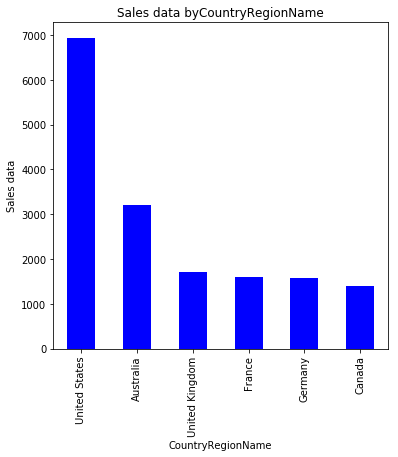

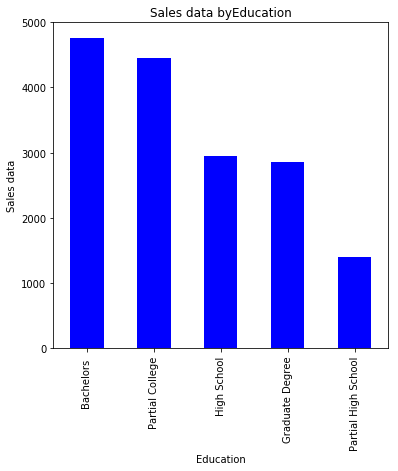

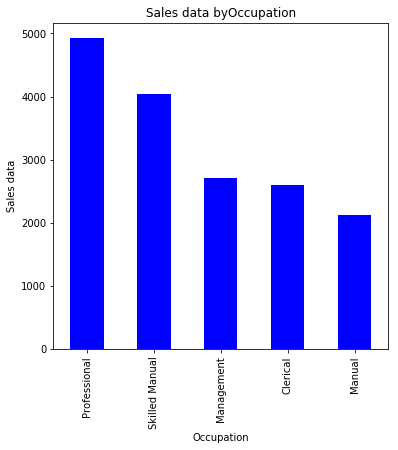

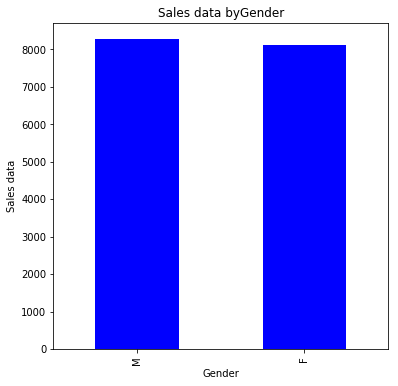

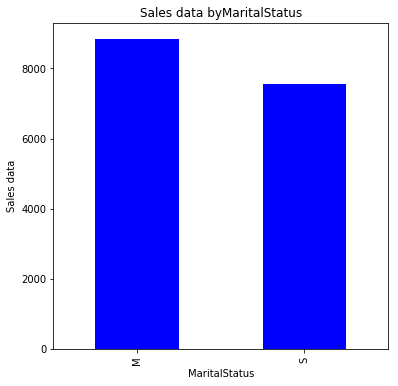

In [17]:
def plot_bars(all_data, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        counts = all_data[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title('Sales data by' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Sales data')# Set text for y axis
        plt.show()

plot_bars(all_data, cate_columns_req)    

#### Histogram

In [231]:
all_data.drop(all_data[['YearlyIncomeLog']], axis=1, inplace=True)

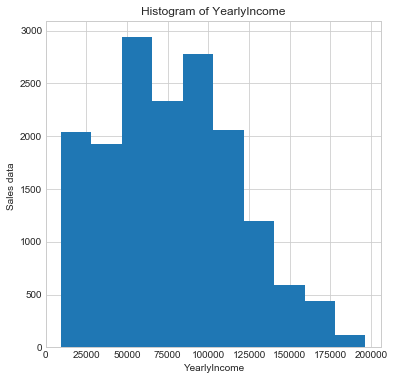

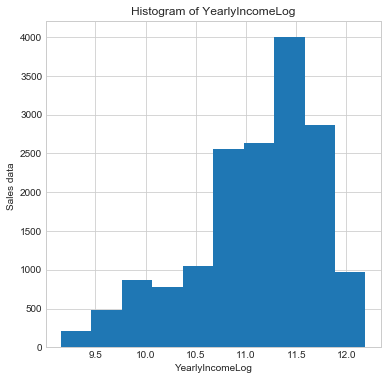

In [230]:
def plot_histogram(all_data, cols, bins = 10):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        all_data[col].plot.hist(ax = ax, bins = bins) # Use the plot.hist method on subset of the data frame
        ax.set_title('Histogram of ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Sales data ')# Set text for y axis
        plt.show()
        
plot_histogram(all_data, ['YearlyIncome', 'YearlyIncomeLog'])

##### Kernel Density Estimate Plot and Histograms Combined

In [ ]:
def plot_density_hist(all_data, cols, bins = 10, hist = False):
    for col in cols:
        sns.set_style("whitegrid")
        sns.distplot(all_data[col], bins = bins, rug=True, hist = hist)
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Number of autos')# Set text for y axis
        plt.show()
        
plot_density_hist(all_data, numerical_columns, hist=True)  

### Two dimensional plots<br>
** Understanding the relationship between two features **

#### Scatter Plots

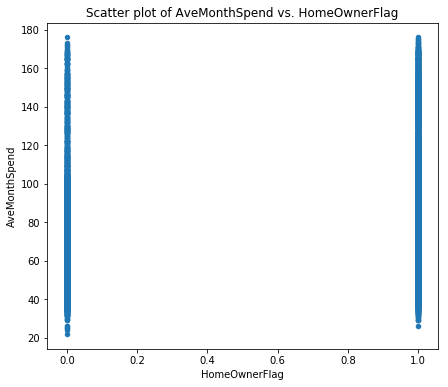

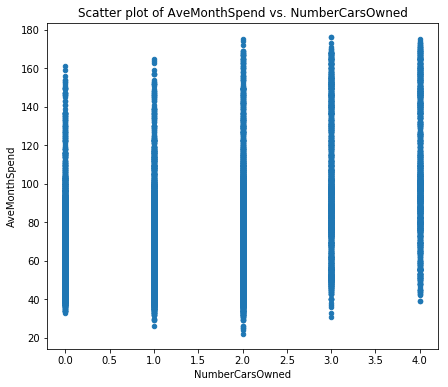

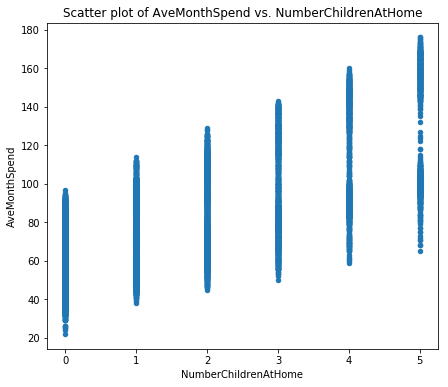

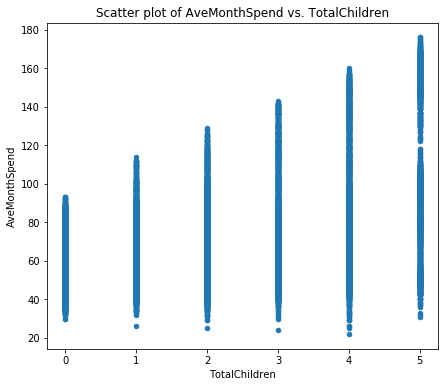

In [43]:
def plot_scatter(all_data, cols, col_y = 'AveMonthSpend'):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        all_data.plot.scatter(x = col, y = col_y, ax = ax)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y
                     )# Set text for y axis
        plt.show()

plot_scatter(all_data, numerical_columns)     

#### Relationship between categorical and numerical variables

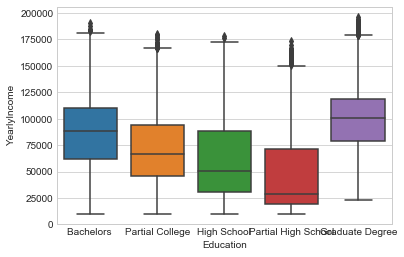

In [45]:
def plot_box(all_data, cols, col_y = 'YearlyIncome'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=all_data)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
plot_box(all_data, ['Education']) 

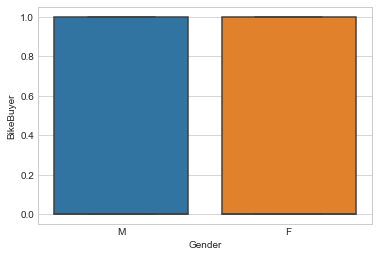

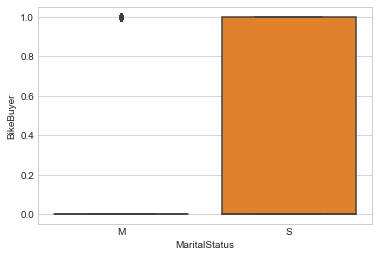

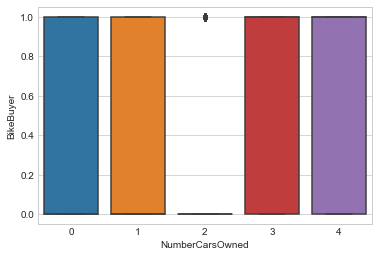

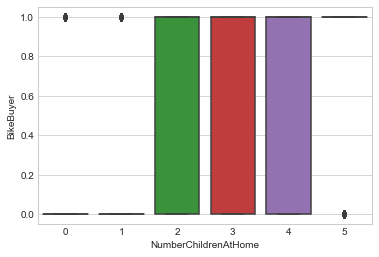

KeyboardInterrupt: 

In [ ]:
plot_box(all_data, ['Gender'], col_y = 'BikeBuyer')
plot_box(all_data, ['MaritalStatus'], col_y = 'BikeBuyer')
plot_box(all_data, ['NumberCarsOwned'], col_y = 'BikeBuyer')
plot_box(all_data, ['NumberChildrenAtHome'], col_y = 'BikeBuyer')
plot_box(all_data, ['YearlyIncome'], col_y = 'BikeBuyer')
#numerical_columns

In [ ]:
plot_box(all_data, ['Occupation'], col_y = 'BikeBuyer')

In [232]:
all_data['AgeFrom1998'] = [1998 - int(str(row).split('-')[0]) for row in all_data['BirthDate']]

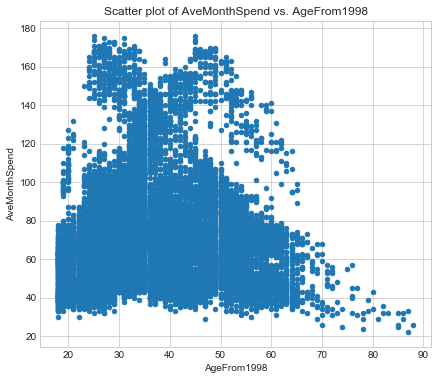

In [47]:
plot_scatter(all_data, ['AgeFrom1998'])

In [15]:
age[:10]

[32, 33, 33, 30, 30, 33, 33, 34, 34, 34]

#### Visualizing relationship among three features

In [23]:
age = [row for row in all_data['AgeFrom1998'] if row > 24 and row < 56]
ageTrueFalse = [row > 19 and row < 61 for row in all_data['AgeFrom1998'] ]

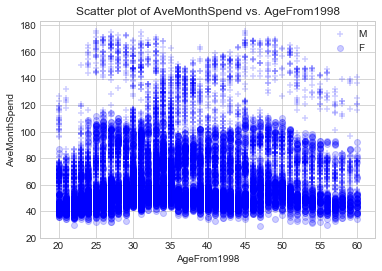

In [24]:
def plot_scatter_shape(all_data, cols, shape_col = 'Gender', col_y = 'AveMonthSpend', alpha = 0.2):
    shapes = ['+', 'o', 's', 'x', '^'] # pick distinctive shapes
    unique_cats = all_data[shape_col].unique()
    for col in cols: # loop over the columns to plot
        sns.set_style("whitegrid")
        for i, cat in enumerate(unique_cats): # loop over the unique categories
            temp = all_data[all_data[shape_col] == cat]
            sns.regplot(col, col_y, data=temp, marker = shapes[i], label = cat,
                        scatter_kws={"alpha":alpha}, fit_reg = False, color = 'blue')
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.legend()
        plt.show()
            
#num_cols = ['curb_weight', 'engine_size', 'horsepower', 'city_mpg']
#age = [row for row in all_data['AgeFrom1998'] if row > 24 and row < 56]
plot_scatter_shape(all_data[ageTrueFalse], ['AgeFrom1998']) 

In [16]:
all_data.groupby(['BikeBuyer'])['YearlyIncome'].count()

BikeBuyer
0    10953
1     5451
Name: YearlyIncome, dtype: int64

### Transforming numeric variables
** Transforming the right-skewed AveMonthSpend to it's log form

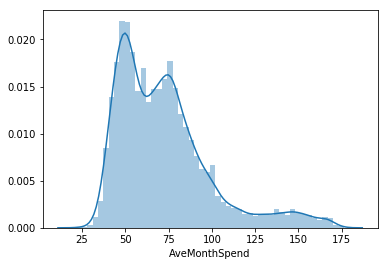

In [33]:
sns.distplot(all_data['AveMonthSpend'])

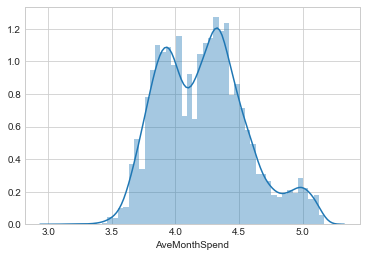

In [233]:
all_data['AveMonthSpendLog'] = np.log(all_data['AveMonthSpend'])
sns.distplot(np.log(all_data['AveMonthSpend']))

## Prepare the model matrix.

All scikit-learn models require a numpy array of numeric only values for the features. The resulting array is often referred to as the **model matrix**. 

To create a model matrix from cases with both numeric and categorical variables requires two steps. First, the numeric features must be rescaled. Second, the categorical variables must be converted to a set of **dummy variables** to encode the presence or not of each category.  

In [235]:
AveMonthSpendLog = all_data['AveMonthSpendLog']
all_data.drop(all_data[['BirthDate','AveMonthSpend','AveMonthSpendLog']], axis=1, inplace=True)
all_data.head()

,CustomerID,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AgeFrom1998
0,11000,Bachelors,Professional,M,M,1,0,0,2,137947,32
1,11001,Bachelors,Professional,M,S,0,1,3,3,101141,33
2,11002,Bachelors,Professional,M,M,1,1,3,3,91945,33
3,11003,Bachelors,Professional,F,S,0,1,0,0,86688,30
4,11004,Bachelors,Professional,F,S,1,4,5,5,92771,30


In [236]:
numerical_columns.append('AgeFrom1998')
print(categorical_columns_req)
print(numerical_columns)

['Education', 'Occupation', 'Gender', 'MaritalStatus']
['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome', 'AgeFrom1998']


##### Encoding categorical features

In [237]:
def encode_string(cat_feature):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_feature)
    enc_cat_feature = enc.transform(cat_feature)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_feature.reshape(-1,1))
    return encoded.transform(enc_cat_feature.reshape(-1,1)).toarray()

Features = encode_string(all_data[categorical_columns_req[0]])
for col in categorical_columns_req:
    if col != categorical_columns_req[0]:
        temp = encode_string(all_data[col])
        Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)
print(Features[:2, :])  

(16404, 14)
[[1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1.]]


#### Add the numeric features
To complete the model matrix, execute the code in the cell below to concatenate the three numeric features.

In [238]:
Features = np.concatenate([Features, np.array(all_data[numerical_columns])], axis = 1)
Features[:2,:]
print(Features.shape)

(16404, 20)


In [239]:
pd.DataFrame(Features).to_csv('Features.csv',index=False)

## Split the dataset

With the model matrix constructed, you must now create randomly sampled training and test data sets. The code in the cell below uses the `train_test_split` function from the `sklearn.model_selection` module to Bernoulli sample the cases in the original dataset into the two subsets. Since this data set is small only 40 cases will be included in the test dataset. Execute this code. 

In [240]:
## Randomly sample cases to create independent training and test data
nr.seed(9988)
labels = np.array(AveMonthSpendLog)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 0.4)
x_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

### Rescale numeric features using StandardScaler from ScikitLearn

In [241]:
scaler = preprocessing.StandardScaler().fit(x_train[:,14:])
x_train[:,14:] = scaler.transform(x_train[:,14:])
x_test[:,14:] = scaler.transform(x_test[:,14:])
print(x_train.shape)
x_train[:3,:]

(9842, 20)


array([[ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.69410561,
         0.44859986, -0.65124974, -1.19500052, -1.16444299, -1.28615004],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  0.69410561,
         0.44859986, -0.65124974, -1.19500052, -0.72394657, -1.28615004],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.69410561,
        -0.42741598,  0.67895675, -0.00459616, -0.89407488, -0.75479894]])

## Construct the linear regression model

In [242]:
## define and fit the linear regression model
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

The model has been fit to the training data. Execute the code in the cell below to examine the value of the intercept term and coefficients.

In [243]:
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[-3.66006990e+10 -3.66006990e+10 -3.66006990e+10 -3.66006990e+10
 -3.66006990e+10 -3.38212754e+10 -3.38212754e+10 -3.38212754e+10
 -3.38212754e+10 -3.38212754e+10  1.35684300e+11  1.35684300e+11
 -6.52623260e+10 -6.52623260e+10  3.80706787e-03 -1.23634338e-02
  1.91622972e-01  1.03588104e-02  1.00448608e-01 -2.38409042e-02]


## Evaluate the model

Mean Square Error      = 0.0037349343336850315
Root Mean Square Error = 0.06111410912125801
Mean Absolute Error    = 0.04717880362951134
Median Absolute Error  = 0.039382579196641565
R^2                    = 0.9687552566006958


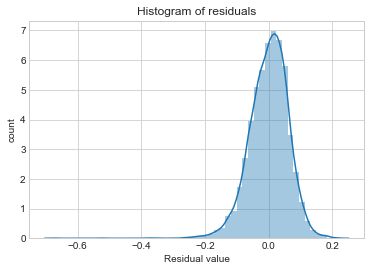

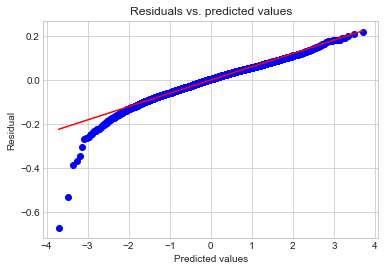

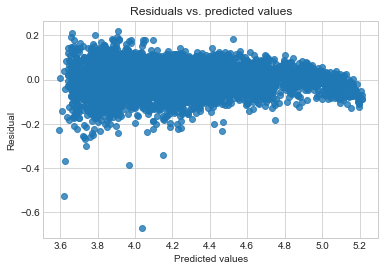

In [244]:
def print_metrics(y_true, y_predicted):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    plt.show()

def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    plt.show()
    
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test, y_score)
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    plt.show()
  

y_score = lin_mod.predict(x_test) 
print_metrics(y_test, y_score) 
hist_resids(y_test, y_score)  
resid_qq(y_test, y_score) 
resid_plot(y_test, y_score) 

In [245]:
print(np.exp(y_score[-20:]))
print(np.exp(y_test[-20:]))

[ 66.0017995   44.82836949  40.4984389   47.26518253  66.14799176
  54.85388447  94.60237838  80.25614953  62.47637674 103.3981918
 101.79985991  68.70290829  57.27208977  49.48891263  80.19249498
  89.80174167  86.64512276  56.62774296  85.33132268  65.23270854]
[ 64.  43.  40.  47.  64.  57.  97.  79.  61. 102.  97.  71.  51.  50.
  78.  93.  83.  58.  81.  68.]


## Apply l2 Regularization

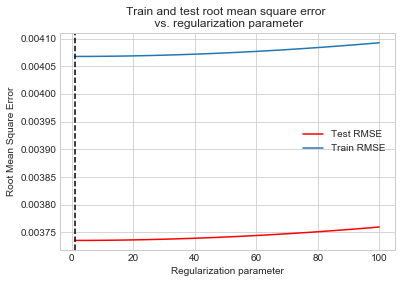

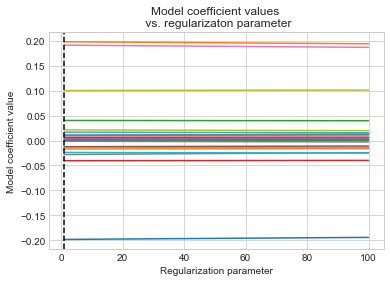

(1, 0.0037355164389824866)


In [246]:
def plot_regularization(l, train_RMSE, test_RMSE, coefs, min_idx, title):   
    plt.plot(l, test_RMSE, color = 'red', label = 'Test RMSE')
    plt.plot(l, train_RMSE, label = 'Train RMSE')    
    plt.axvline(min_idx, color = 'black', linestyle = '--')
    plt.legend()
    plt.xlabel('Regularization parameter')
    plt.ylabel('Root Mean Square Error')
    plt.title(title)
    plt.show()
    
    plt.plot(l, coefs)
    plt.axvline(min_idx, color = 'black', linestyle = '--')
    plt.title('Model coefficient values \n vs. regularizaton parameter')
    plt.xlabel('Regularization parameter')
    plt.ylabel('Model coefficient value')
    plt.show()

def test_regularization_l2(x_train, y_train, x_test, y_test, l2):
    train_RMSE = []
    test_RMSE = []
    coefs = []
    for reg in l2:
        lin_mod = linear_model.Ridge(alpha = reg)
        lin_mod.fit(x_train, y_train)
        coefs.append(lin_mod.coef_)
        y_score_train = lin_mod.predict(x_train)
        train_RMSE.append(sklm.mean_squared_error(y_train, y_score_train))
        y_score = lin_mod.predict(x_test)
        test_RMSE.append(sklm.mean_squared_error(y_test, y_score))
    min_idx = np.argmin(test_RMSE)
    min_l2 = l2[min_idx]
    min_RMSE = test_RMSE[min_idx]
    
    title = 'Train and test root mean square error \n vs. regularization parameter'
    plot_regularization(l2, train_RMSE, test_RMSE, coefs, min_l2, title)
    return min_l2, min_RMSE
     
l2 = [x for x in range(1,101)]
out_l2 = test_regularization_l2(x_train, y_train, x_test, y_test, l2)
print(out_l2)

** Next, evaluate the model using the best l2 regularization parameter discovered above. The code in the cell below computes the regression model with the training data and computes and displays the results using the test data. **

Mean Square Error      = 0.0037355164389824866
Root Mean Square Error = 0.06111887138177935
Mean Absolute Error    = 0.04718749418297223
Median Absolute Error  = 0.03935755373115768
R^2                    = 0.9687503869754159


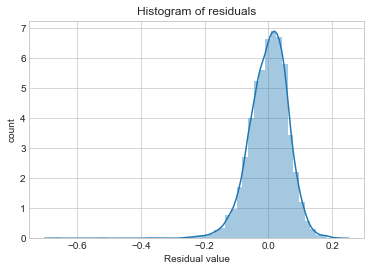

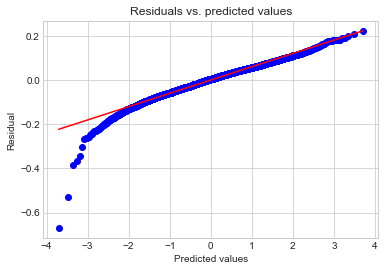

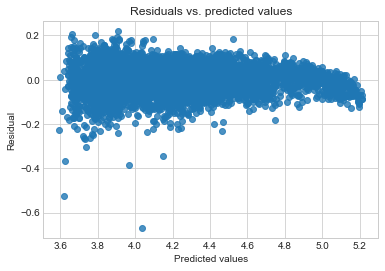

In [247]:
lin_mod_l2 = linear_model.Ridge(alpha = out_l2[0])
lin_mod_l2.fit(x_train, y_train)
y_score_l2 = lin_mod_l2.predict(x_test)

print_metrics(y_test, y_score_l2)
hist_resids(y_test, y_score_l2)  
resid_qq(y_test, y_score_l2) 
resid_plot(y_test, y_score_l2)


## Predicting the test data
** Load the FeaturesTestData.csv file **

In [252]:
FeaturesTest = np.array(pd.read_csv('FeaturesTestData.csv'))
print(FeaturesTest.shape)

(500, 20)


### Rescale numeric features using StandardScaler from ScikitLearn

In [253]:
scaler = preprocessing.StandardScaler().fit(FeaturesTest[:,14:])
FeaturesTest[:,14:] = scaler.transform(FeaturesTest[:,14:])
FeaturesTest[:,14:] = scaler.transform(FeaturesTest[:,14:])
print(FeaturesTest.shape)
FeaturesTest[:3,:]

(500, 20)


array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        , -4.40610687,
        -1.08553712, -1.17321043, -0.31205332, -2.01530933, -3.18883867],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  0.08940661,
        -1.08553712, -0.38689236, -0.66016322, -2.01530133, -3.34691779],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  0.08940661,
        -1.08553712, -1.17321043, -0.66016322, -2.01529898, -3.09731918]])

## Use the trained model to predict the test data and evluate it

In [254]:
lin_mod_l2 = linear_model.Ridge(alpha = out_l2[0])
lin_mod_l2.fit(x_train, y_train)
y_score_l2 = lin_mod_l2.predict(FeaturesTest)

In [255]:
pd.DataFrame(np.exp(y_score_l2)).to_csv('TestDataResultl2.csv', index=False)